<a href="https://colab.research.google.com/github/NatasaKinzy/Data-Science/blob/main/Unit2/Final_NataKinzUnit2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Unit 2 Project**

First I'm going to make all necessary instalations:

In [ ]:
!pip install preliz

In [ ]:
#We'll also need to re-import those libraries

import preliz as pz

In [ ]:
#These libraries don't need to be reinstalled each time, but they will need to be
#re-imported each time

import numpy as np
import arviz as az
import pymc as pm

# **Context**

Are you a Marvel fan? Have you ever wondered what in the world they're doing and whether they'll make ANY profit on their new movie. Well, suprisingly to me, they tend to make at least a couple hundred million in net gross income every time.

My question is... **what is the probability that the next Marvel movie will break $800 million gross?**

Marvel Studios is a globally famous studio that produces movies based on/inspired by many of Stan Lee's comic books. Their movies are about Superheros saving the world, but that's pretty much the biggest commonality. They have a fairly large variety in where the superheros are from, how they gained the powers, who they are, their internal struggles, and who they need to fight. Given that there is so much variety in each of their stories, I assume that their income from each of their movies would be fairly different. However, they must make at least a couple hundred million from each in order to fund their next projects.



# **Prior**


While I've already accidentally looked at the worldwide gross income of a few of the Marvel movies, I'm relatively uninformed about this. Given that Marvel movies keep fluctuating in quality, but also knowing the next Marvel movie will be Spiderman: Brand New Day, I think there is a 0.4 probability that it will break $800 million gross, and a 0.6 probability it will not.




# **Likelihood**

Marvel Studios has released 37 movies; this list says who has and who has not broken my threshold of $800 million gross.

1. Captain America: The First Avenger: no

2. The Fantastic Four: First Steps: no

3. Captain Marvel: yes

4. Iron Man: no

5. Iron Man 2: no

6. The Incredible Hulk: no

7. Thor: no

8. The Avengers: yes

9. Thor: The Dark World: no

10. Iron Man 3: yes

11. Captain America: The Winter Soldier: no

12. Guardians of the Galaxy: no

13. Guardians of the Galaxy Vol. 2: yes

14. Avengers: Age of Ultron: yes

15. Ant-Man: no

16. Captain America: Civil War: yes

17. Black Widow: no

18. Spider-Man: Homecoming: yes

19. Black Panther: yes

20. Doctor Strange: no

21. Thor: Ragnarok: yes

22. Ant-Man and the Wasp: no

23. Avengers: Infinity War: yes

24. Avengers: Endgame: yes

25. Spider-Man: Far From Home: yes

26. Shang-Chi and the Legend of the Ten Rings: no

27. Eternals: no

28. Spider-Man: No Way Home: yes

29. Doctor Strange in the Multiverse of Madness: yes

30. Thor: Love and Thunder: no

31. Black Panther: Wakanda Forever: yes

32. Ant-Man and the Wasp: Quantumania: no

33. Guardians of the Galaxy Vol. 3: yes

34. The Marvels: no

35. Deadpool & Wolverine: yes

36. Captain America: Brave New World: no

37. Thunderbolts: no


In [ ]:
#Wemby's FTs in the 2023/2024 season, makes then misses
FT_data_2324 = np.repeat([1,0], repeats = [17,20])

In [ ]:
with pm.Model() as wmby_FT_2324_model:
  #same prior from before based on Euroleague data
  θ = pm.Beta('θ' , alpha = 0.4 , beta = 0.6)

  #same likelihood, with our stand in for the binomial distribution
  #but with the updated data
  y = pm.Bernoulli('y', p = θ, observed = FT_data_2324)

  #sample from the posterior, 2000 for a more prcise picture later
  idata_FT_2324 = pm.sample(2000)

<Axes: title={'center': 'θ'}>

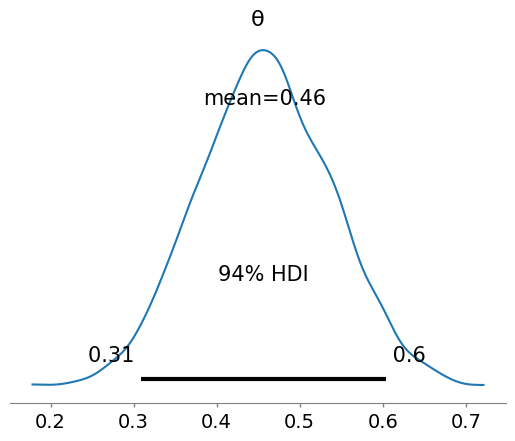

In [ ]:
#vizualize the 2000 samples from the pymc model of the posterior
az.plot_posterior(idata_FT_2324)

# **Analysis**

My prior was 0.4, so I essentially guessed that there would be a 40% chance that the next Marvel movie would break $800 million gross. The likelihood turned out to be 46%. I would consider this a fairly accurate prior, given that my guess was based on very limited knowledge about the past gross income of Marvel movies. My guess was mostly based on the fact that I think about half of the Marvel movies are particularly amazing, and I know that they're more recent movies tend to be very HIT or MISS. But additionally, I also was slightly biased by the fact that I had already begun researching the gross income of Marvel movies and had seen the net gross of 4 before I made my guess.

I don't believe my likelihood is entirely accurate. My data came from a fairly small set, only 37 data points, and that can lead to misconstruing the actual outcome. Additionally, the horizontal axis of my posterior has a range of 0.2 to 0.7 and my posterior itself has a range of 0.31-0.6. This indicates that my posterior is a fairly vague guess and that could be due to the fact that my prior is based on a limited set of 37 data points. Also, my likelihood doesn't take into account the fact that every single Spiderman Marvel movie has broken the $800 million gross benchmark, and the next Marvel movie will be another Spiderman.

I believe that given that this data analysis method is only capable of giving yeses and nos, and can't take into account the nuances of real life, my likelihood should probably be closer to 90%.

# **Sources**

Movies List: https://www.space.com/marvel-movies-in-order

Gross Income: https://www.the-numbers.com/movies/franchise/Marvel-Cinematic-Universe#tab=summary

Next Marvel movie: https://editorial.rottentomatoes.com/article/full-list-of-all-upcoming-marvel-movies/
